In [1]:
import numpy as np
import cv2
import PIL
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

In [2]:
imagen = Image.open('img/jupiter.jpeg')
imagen_array = np.array(imagen)

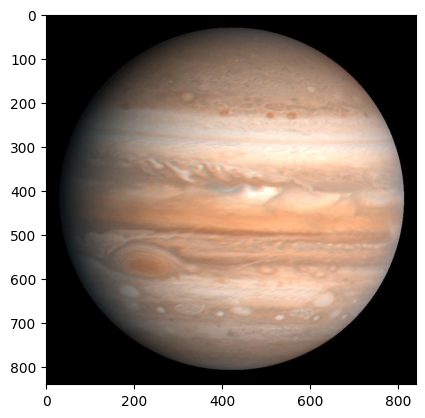

In [3]:
plt.imshow(imagen)
plt.show()

imagen.save('salidas/jupiter_copia.png')

In [4]:
print("primer pixel de la imagen ", imagen_array[0,0])


primer pixel de la imagen  [0 0 0]


In [5]:
imagen_recortada_array = imagen_array[200:400, 200:400]
imagen_recortada = Image.fromarray(imagen_recortada_array.astype('uint8'))

# plt.imshow(imagen_recortada)
# plt.show()

# imagen_recortada.save('salidas/jupiter_recortada.png')

In [40]:
mask = np.zeros(imagen_array.shape[:2], np.uint8)
mask[100:300, 100:400] = 1
masked_img=cv2.bitwise_and(imagen_array,imagen_array,mask= mask)

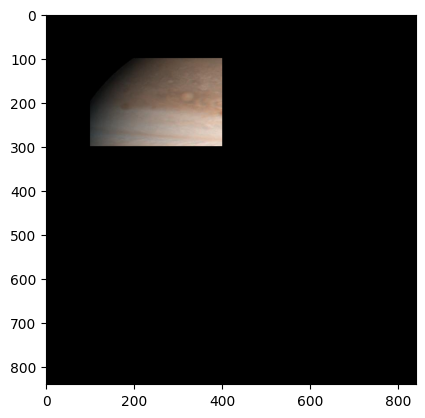

In [41]:
plt.imshow(masked_img.astype('uint8'))
plt.show()

In [10]:
## color medio de la imagen dentro de la mascara
mean_color = np.mean(imagen_array[mask == 255], axis=0) 
#cantidad de pixeles dentro de la mascara
print("cantidad de pixeles dentro de la mascara", np.sum(mask == 255))
print("color medio", mean_color)

cantidad de pixeles dentro de la mascara 60000
color medio [118.40933333 103.26925     92.38331667]


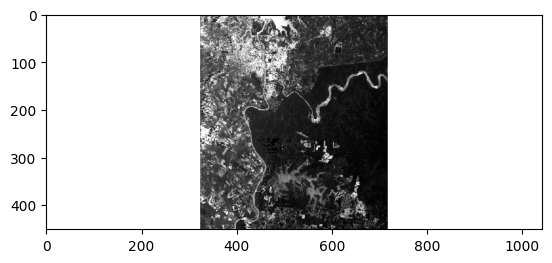

In [47]:
imagen_lc = Image.open('img/LC08_224-078_2018-01-05_blue.tif')

plt.imshow(imagen_lc)
plt.show()

In [48]:
imagen_lc_array = np.array(imagen_lc)

mask = np.zeros(imagen_lc_array.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img=cv2.bitwise_and(imagen_lc_array,imagen_lc_array,mask= mask)


In [49]:
imagen_lc_array.shape

(451, 1042, 4)

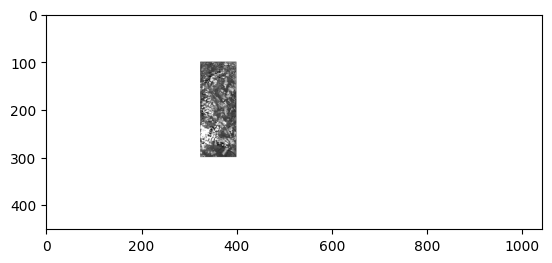

In [50]:
plt.imshow(masked_img.astype('uint8'))
plt.show()

In [51]:
#color medio de la imagen dentro de la mascara
mean_color = np.mean(imagen_lc_array[mask == 255], axis=0)
#cantidad de pixeles dentro de la mascara
print("cantidad de pixeles dentro de la mascara", np.sum(mask == 255))
print("color medio", mean_color)


cantidad de pixeles dentro de la mascara 60000
color medio [28.23188333 28.23188333 28.23188333 64.566     ]


PUNTO 4
FUNCION GAMMA

In [112]:
def ajuste_gamma(imagen,gamma):
    imagenresultado=255*((imagen/255)**gamma)
    imagenresultado=imagenresultado.astype('uint8')
    return imagenresultado

img = cv2.imread('img/jupiter.jpeg', 0)

img_gamma_05 = ajuste_gamma(img, 0.5)
img_gamma_15 = ajuste_gamma(img, 1.5)


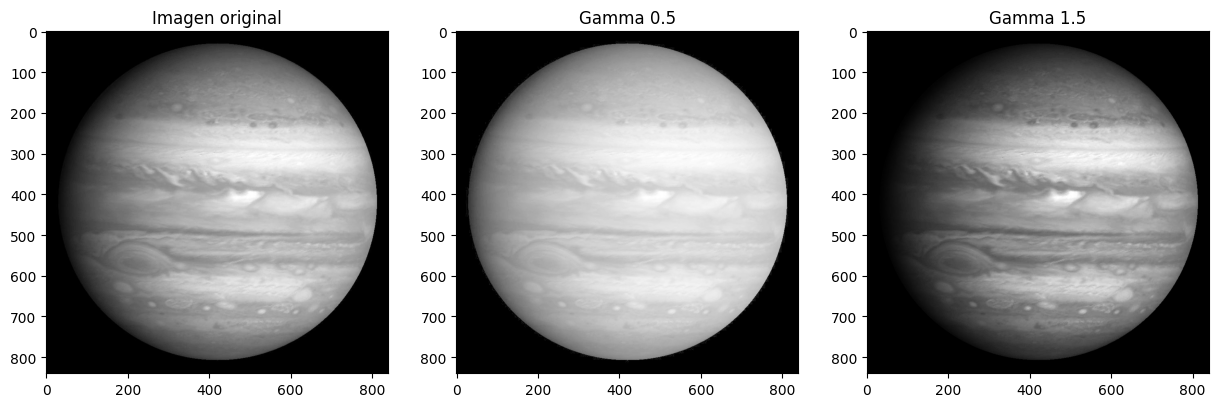

In [113]:
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(15, 5))
ax1.imshow(img, cmap='gray')
ax1.set_title('Imagen original')
ax2.imshow(img_gamma_05, cmap='gray')
ax2.set_title('Gamma 0.5')
ax3.imshow(img_gamma_15, cmap='gray')
ax3.set_title('Gamma 1.5')
plt.show()


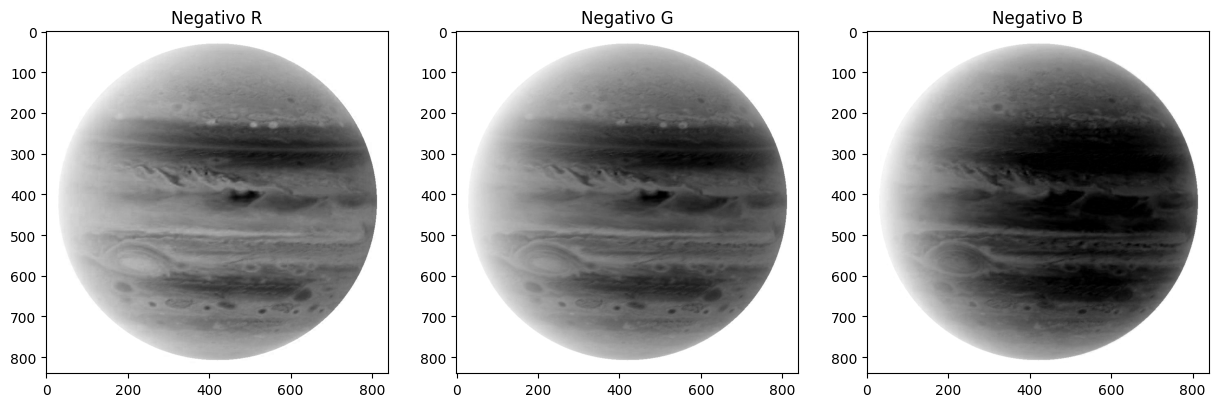

In [115]:
# negativo de la imagen
img = cv2.imread('img/jupiter.jpeg')
img_negativo_r = 255 - np.array(img)[:,:,0]
img_negativo_g = 255 - np.array(img)[:,:,1]
img_negativo_b = 255 - np.array(img)[:,:,2]

#plot 3 negativos
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(15, 5))
ax1.imshow(img_negativo_r, cmap='gray')
ax1.set_title('Negativo R')
ax2.imshow(img_negativo_g, cmap='gray')
ax2.set_title('Negativo G')
ax3.imshow(img_negativo_b, cmap='gray')
ax3.set_title('Negativo B')
plt.show()



PUNTO 7 HISTOGRAMA

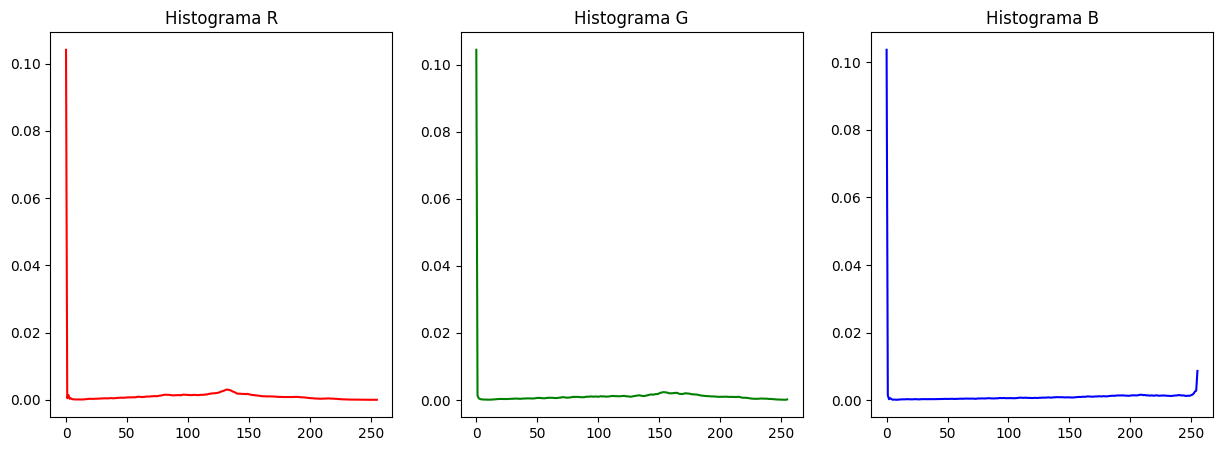

In [118]:
# histograma de cada banda
img = cv2.imread('img/jupiter.jpeg')

hist_r = cv2.calcHist([img],[0],None,[256],[0,256])
hist_r = hist_r/img.size
hist_g = cv2.calcHist([img],[1],None,[256],[0,256])
hist_g = hist_g/img.size
hist_b = cv2.calcHist([img],[2],None,[256],[0,256])
hist_b = hist_b/img.size

fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(15, 5))
ax1.plot(hist_r, color='red')
ax1.set_title('Histograma R')
ax2.plot(hist_g, color='green')
ax2.set_title('Histograma G')
ax3.plot(hist_b, color='blue')
ax3.set_title('Histograma B')
plt.show()


PUNTO 8

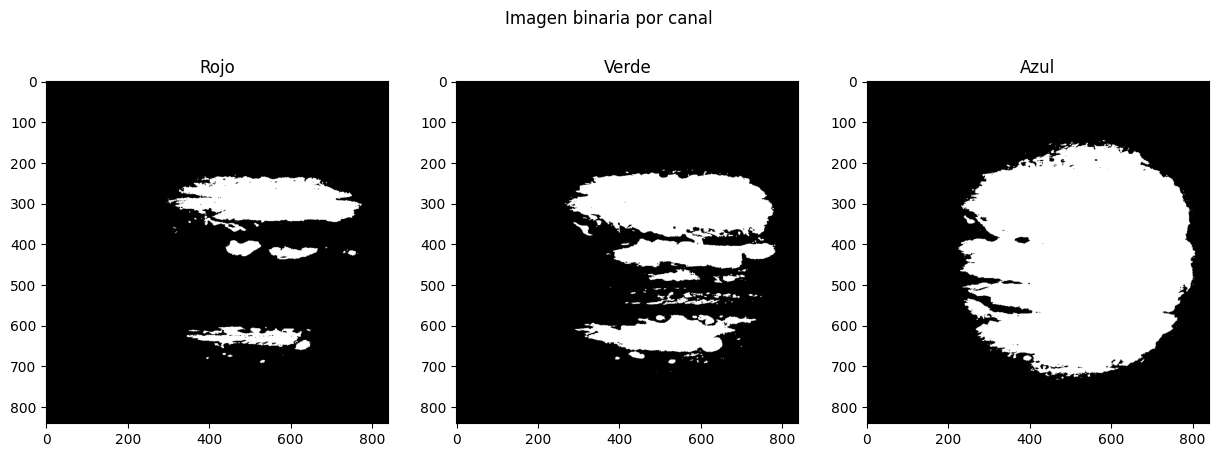

In [109]:
# aplicar umbral de 100 resultando imagen binaria y plot
img = cv2.imread('img/jupiter.jpeg')

img_r = img[:,:,0]
img_g = img[:,:,1]
img_b = img[:,:,2]

thresh = 180
img_bin_r = cv2.threshold(img_r, thresh, 255, cv2.THRESH_BINARY)[1]
img_bin_g = cv2.threshold(img_g, thresh, 255, cv2.THRESH_BINARY)[1]
img_bin_b = cv2.threshold(img_b, thresh, 255, cv2.THRESH_BINARY)[1]

fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(15, 5))
ax1.imshow(img_bin_r, cmap='gray')
ax1.set_title('Rojo')
ax2.imshow(img_bin_g, cmap='gray')
ax2.set_title('Verde')
ax3.imshow(img_bin_b, cmap='gray')
ax3.set_title('Azul')

plt.suptitle('Imagen binaria por canal')
plt.show()


PUNTO 9